In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import calendar
from wordcloud import WordCloud
from pandas.api.types import is_string_dtype
from dataprep.clean import clean_text

sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (15,6)

In [2]:
df = pd.read_csv('./inputs/goodreads_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,title,language,series,author,pages,avg_rating,no_ratings,description,awards
0,0,Harry Potter and the Sorcerer's Stone (Harry P...,English,Harry Potter,J.K. Rowling,309 pages,['4.47'],"8,061,457",Harry Potter's life is miserable. His parents ...,Mythopoeic Fantasy Award for Children's Litera...
1,1,The Book Thief,English,NaN,Markus Zusak,552 pages,['4.38'],"2,077,981",Librarian's note: An alternate cover edition c...,National Jewish Book Award for Children’s and ...
2,2,"The Hunger Games (The Hunger Games, #1)",English,The Hunger Games,Suzanne Collins,374 pages,['4.32'],"7,075,501","Could you survive on your own in the wild, wit...",Locus Award Nominee for Best Young Adult Book ...
3,3,Harry Potter and the Goblet of Fire (Harry Pot...,English,Harry Potter,J.K. Rowling,734 pages,['4.56'],"2,924,940",Harry Potter is midway through his training as...,"Hugo Award for Best Novel (2001), Mythopoeic F..."
4,4,"The Handmaid's Tale (The Handmaid's Tale, #1)",English,The Handmaid's Tale,Margaret Atwood,314 pages,['4.12'],"1,664,565",Offred is a Handmaid in the Republic of Gilead...,"Booker Prize Nominee (1986), Nebula Award Nomi..."


In [4]:
df.shape

(100, 10)

In [5]:
df.dtypes

Unnamed: 0      int64
title          object
language       object
series         object
author         object
pages          object
avg_rating     object
no_ratings     object
description    object
awards         object
dtype: object

In [6]:
df.isna().sum()

Unnamed: 0      0
title           0
language       13
series         59
author          0
pages          14
avg_rating      0
no_ratings      0
description    13
awards         22
dtype: int64

In [7]:
df1 = df.copy()

In [8]:
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1['avg_rating'] = df['avg_rating'].apply(lambda x: float(x[2:6]))
df1['no_ratings'] = [float(str(i).replace(',', '')) for i in df1['no_ratings']]
df1['pages'] = df1['pages'].fillna(0)
df1['pages'] = [int(str(i).replace('pages', '')) for i in df1['pages']]

for col in df1:
    if is_string_dtype:
        clean_text(df1, col)

In [9]:
df1.sample()

,title,language,series,author,pages,avg_rating,no_ratings,description,awards
38,The Amazing Adventures of Kavalier & Clay,English,NaN,Michael Chabon,639,4.17,192189.0,"Joe Kavalier, a young Jewish artist who has al...","Pulitzer Prize for Fiction (2001), PEN/Faulkne..."


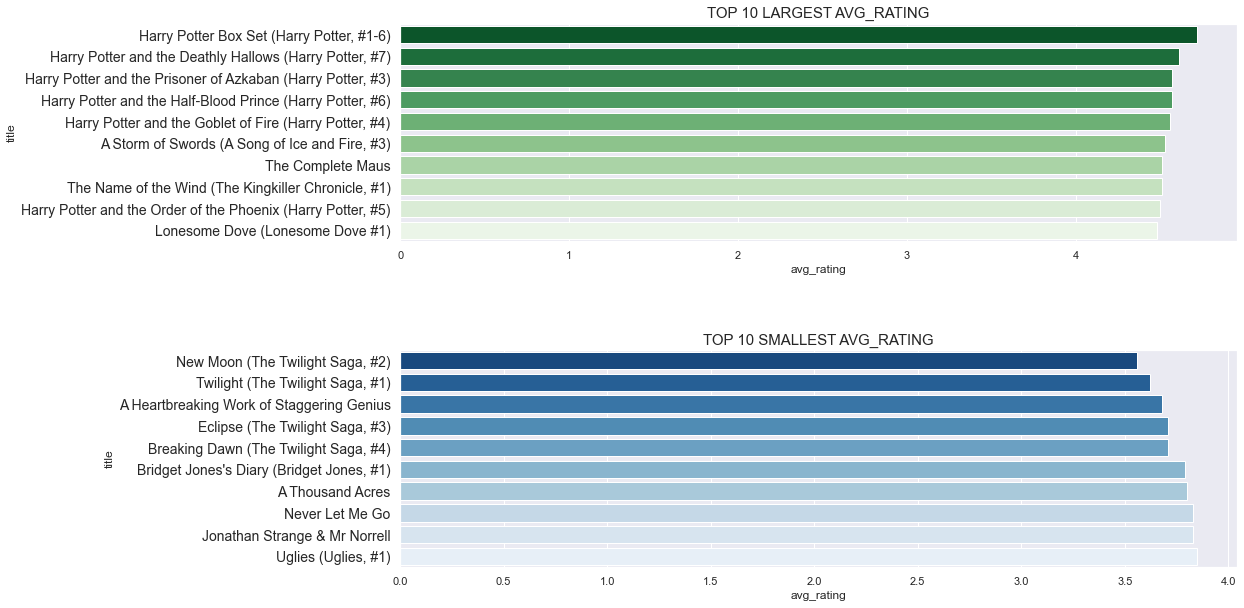

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.barplot(y='title', x='avg_rating', data=df1.nlargest(10, 'avg_rating'), palette='Greens_r')
plt.title(f'TOP 10 LARGEST AVG_RATING', size=15)
plt.yticks(fontsize=14)

plt.subplot(2,1,2)
sns.barplot(y='title', x='avg_rating', data=df1.nsmallest(10, 'avg_rating'), palette='Blues_r')
plt.title(f'TOP 10 SMALLEST AVG_RATING', size=15)
plt.yticks(fontsize=14)
plt.subplots_adjust(hspace=0.5)